# Association Rule Mining with FP Growth Algorithm on 1150 Haber Dataset

In [1]:
# Sevde Nur Ağba 2019555001
# Rabia Kahya 2019555322

import os
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import networkx as nx


def convert_to_transactions(input_folder):
    transactions = []
    for filename in os.listdir(input_folder):
        with open(os.path.join(input_folder, filename), 'r', encoding='utf-8') as file:
            preprocessed_text = file.read().split()
            transactions.append(preprocessed_text)
    return transactions

input_folder = 'C:/Users/s_agb/Desktop/1150_output'
transactions = convert_to_transactions(input_folder)

In [2]:
# Convert transactions to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,0,0212,0392,05,06,1,10,100,1000,101,...,şık,şıklarını,şıklık,şıklığının,şıklığıyla,şıkta,şıktı,şımartmayacağını,şımarık,şırınga
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# Printing dataset information
num_instances, num_attributes = df.shape
print(f"Number of instances: {num_instances}")
print(f"Number of attributes: {num_attributes}")

Number of instances: 1150
Number of attributes: 50548


In [16]:
# Apply FP-Growth algorithm
frequent_itemsets = fpgrowth(df, min_support=0.1, use_colnames=True)

# Print the DataFrame
print("Frequent Itemsets:")

# Assuming frequent_itemsets is your DataFrame with frequent itemsets
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)

# Print the sorted DataFrame
print(frequent_itemsets_sorted)


Frequent Itemsets:
      support                    itemsets
30   0.789565                       (bir)
31   0.417391                      (olan)
0    0.411304                        (Bu)
1    0.405217                    (olarak)
114  0.366957                   (bir, Bu)
225  0.354783                 (olan, bir)
118  0.341739               (bir, olarak)
2    0.324348                     (sonra)
48   0.309565                      (dedi)
60   0.297391                     (kadar)
126  0.288696                (bir, sonra)
42   0.287826                       (ilk)
3    0.274783                    (olduğu)
297  0.273913                 (dedi, bir)
323  0.267826                (kadar, bir)
32   0.266087                  (olduğunu)
4    0.265217                         (a)
274  0.252174                  (ilk, bir)
5    0.248696                      (göre)
33   0.245217                     (büyük)
226  0.241739             (bir, olduğunu)
6    0.239130                      (yeni)
7    0.236522  

In [9]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# Display the association rules with confidence greater than 0.8
print("\nAssociation Rules:")
print(rules)


Association Rules:
               antecedents consequents  antecedent support  \
0                     (Bu)       (bir)            0.411304   
1               (olan, Bu)       (bir)            0.225217   
2                 (olarak)       (bir)            0.405217   
3             (Bu, olarak)       (bir)            0.220870   
4       (Bu, olan, olarak)       (bir)            0.140000   
5           (olan, olarak)       (bir)            0.221739   
6                  (sonra)       (bir)            0.324348   
7              (Bu, sonra)       (bir)            0.168696   
8          (olarak, sonra)       (bir)            0.156522   
9            (olan, sonra)       (bir)            0.155652   
10                (olduğu)       (bir)            0.274783   
11        (olarak, olduğu)       (bir)            0.141739   
12            (Bu, olduğu)       (bir)            0.140870   
13         (olduğu, sonra)       (bir)            0.112174   
14          (olan, olduğu)       (bir)            

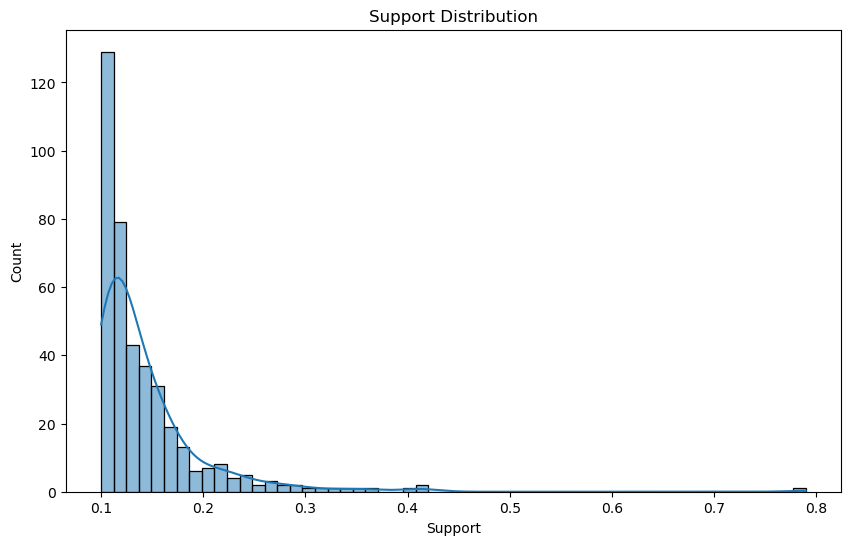

In [6]:
# Visualize Support Distribution
plt.figure(figsize=(10, 6))
sns.histplot(frequent_itemsets['support'], kde=True)
plt.title('Support Distribution')
plt.xlabel('Support')
plt.ylabel('Count')
plt.show()

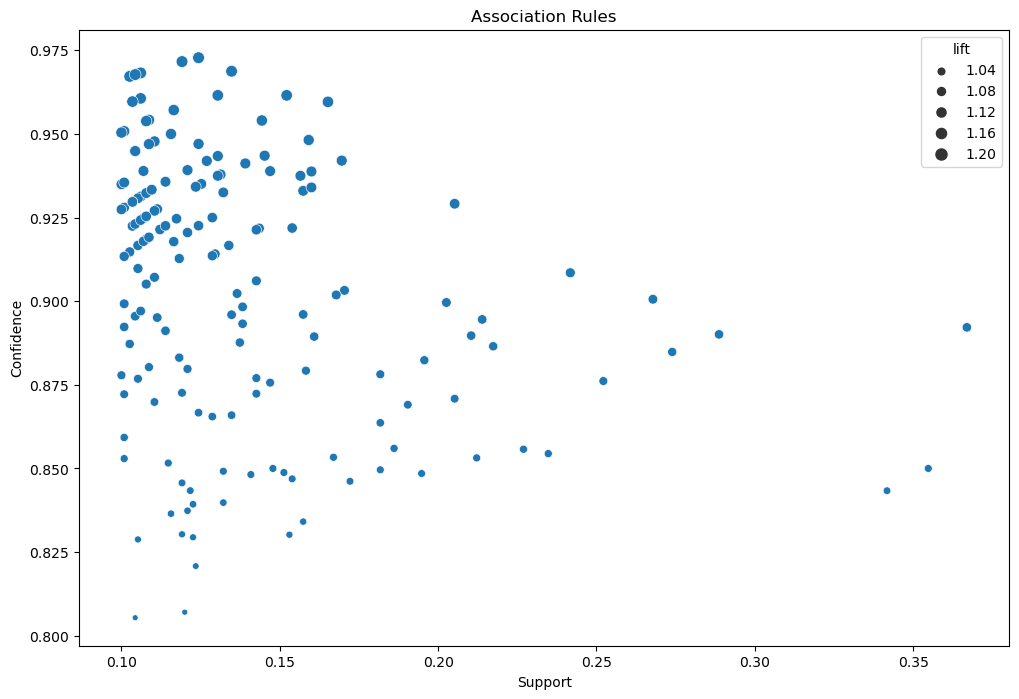

In [7]:
# Visualize Association Rules
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

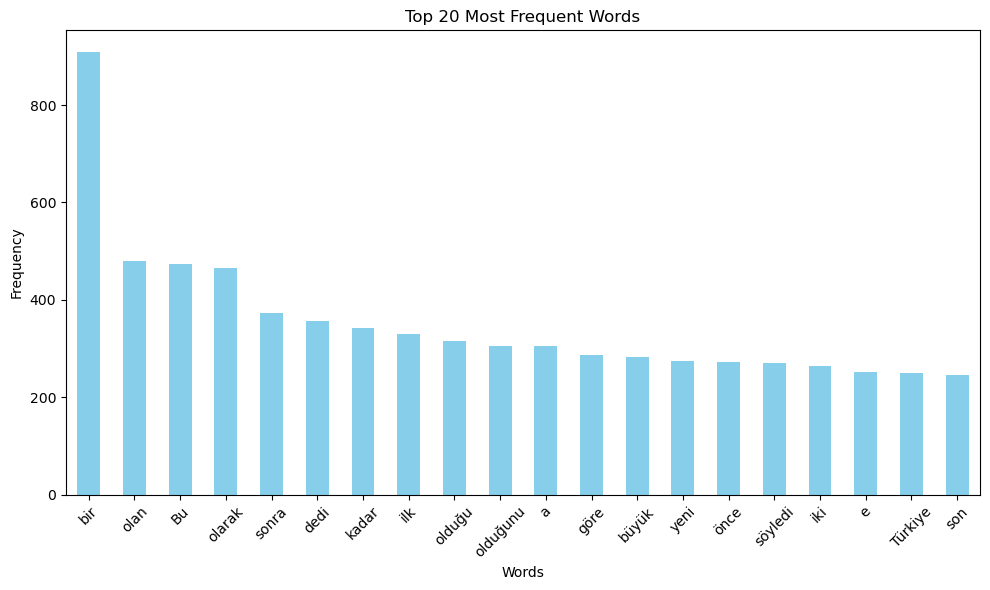

In [8]:
# Calculate word frequency across all transactions
word_freq = df.sum().sort_values(ascending=False)

# Set the number of top frequent words you want to visualize
top_n = 20  # Change this number according to your preference

# Select the top 'top_n' frequent words
top_word_freq = word_freq[:top_n]

# Plotting the top 'top_n' frequent words
plt.figure(figsize=(10, 6))
top_word_freq.plot(kind='bar', color='skyblue')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

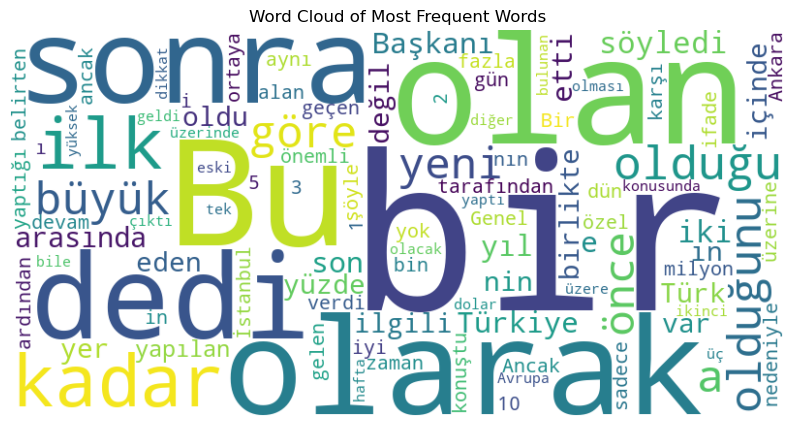

In [9]:
# Word Cloud of Most Frequent Words
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

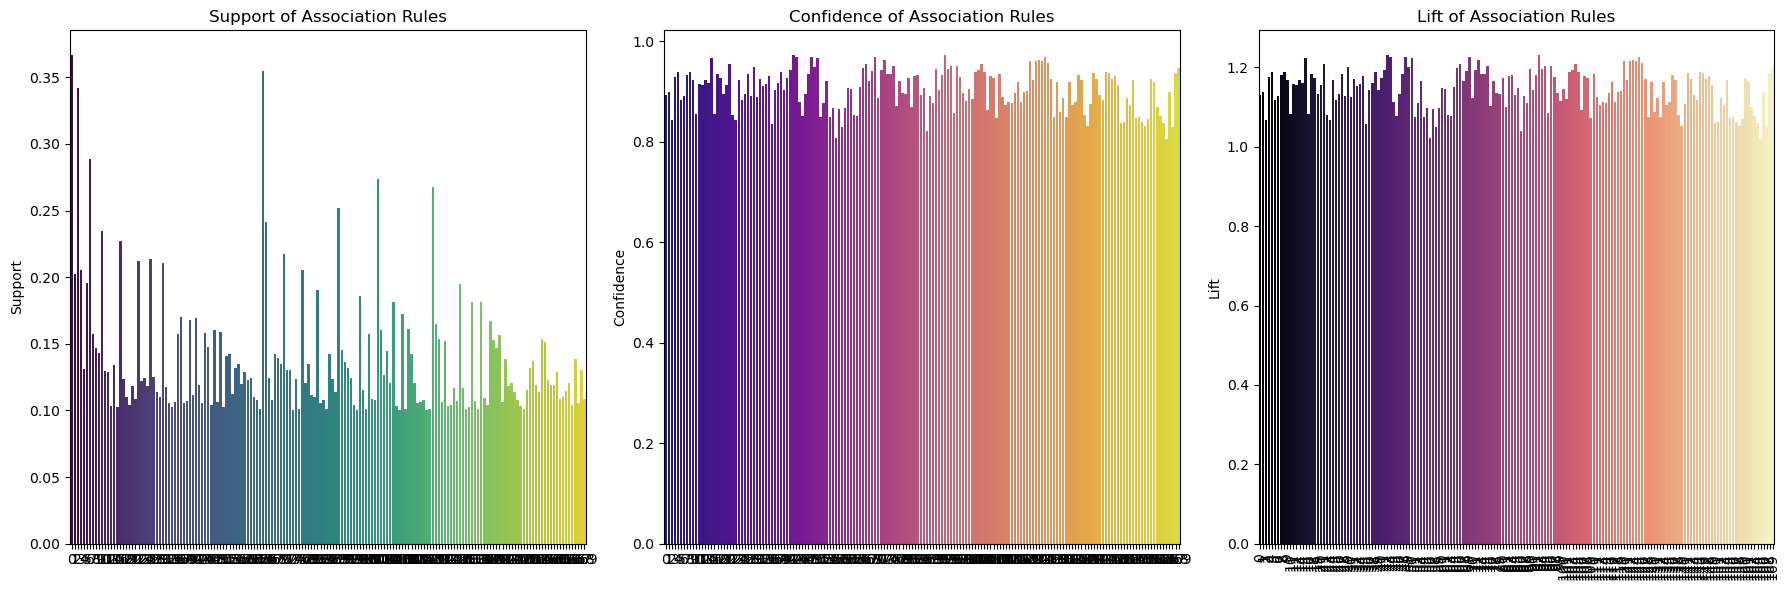

In [10]:
# Bar Plot of Association Rule Metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
sns.barplot(ax=axes[0], x=rules.index, y=rules['support'], palette='viridis')
axes[0].set_title('Support of Association Rules')
axes[0].set_ylabel('Support')

sns.barplot(ax=axes[1], x=rules.index, y=rules['confidence'], palette='plasma')
axes[1].set_title('Confidence of Association Rules')
axes[1].set_ylabel('Confidence')

sns.barplot(ax=axes[2], x=rules.index, y=rules['lift'], palette='magma')
axes[2].set_title('Lift of Association Rules')
axes[2].set_ylabel('Lift')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

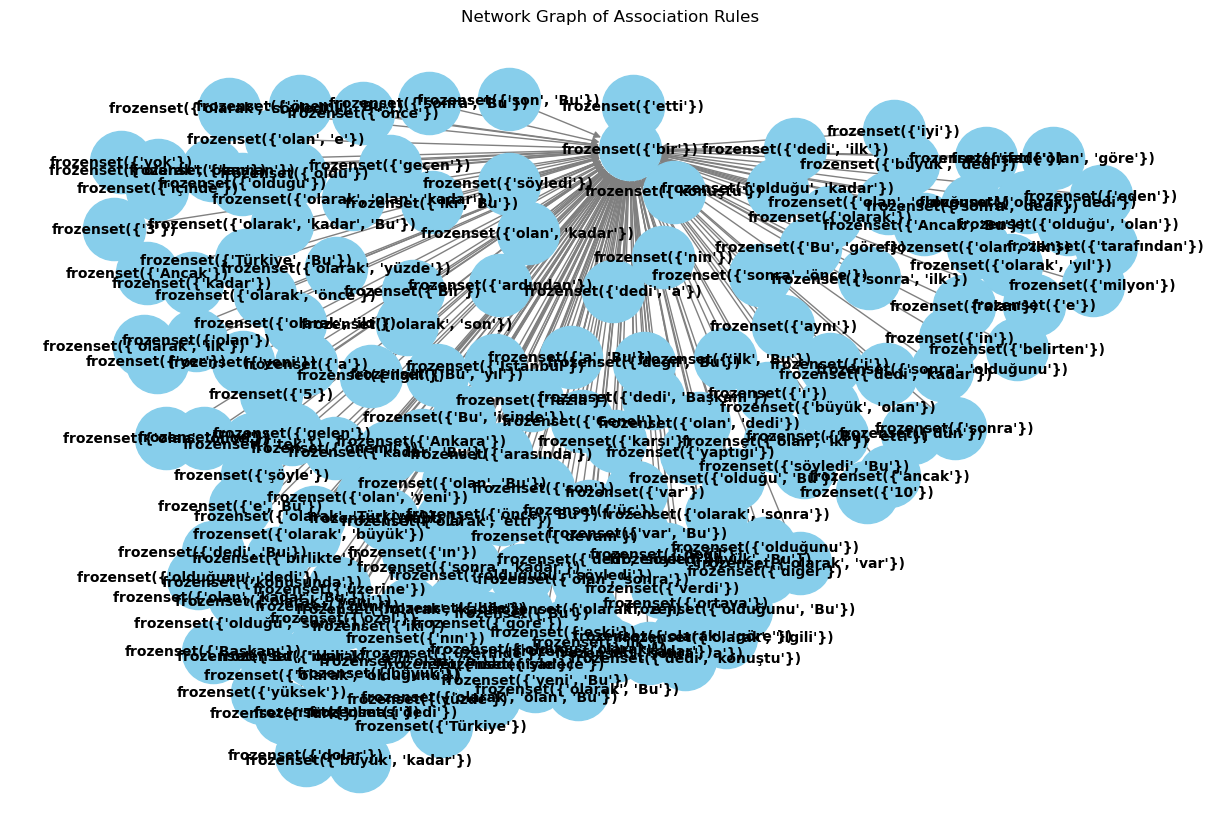

In [11]:
# Network Graph of Association Rules
G = nx.DiGraph()

for idx, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_weight='bold', font_size=10, edge_color='gray')
plt.title('Network Graph of Association Rules')
plt.show()

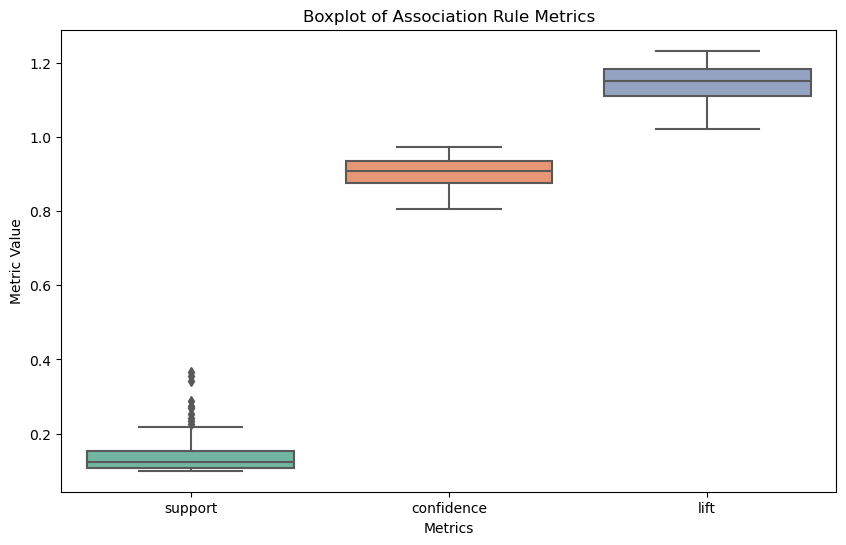

In [12]:
# Boxplot of Association Rule Metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=rules[['support', 'confidence', 'lift']], palette='Set2')
plt.title('Boxplot of Association Rule Metrics')
plt.ylabel('Metric Value')
plt.xlabel('Metrics')
plt.show()

C:\Users\s_agb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


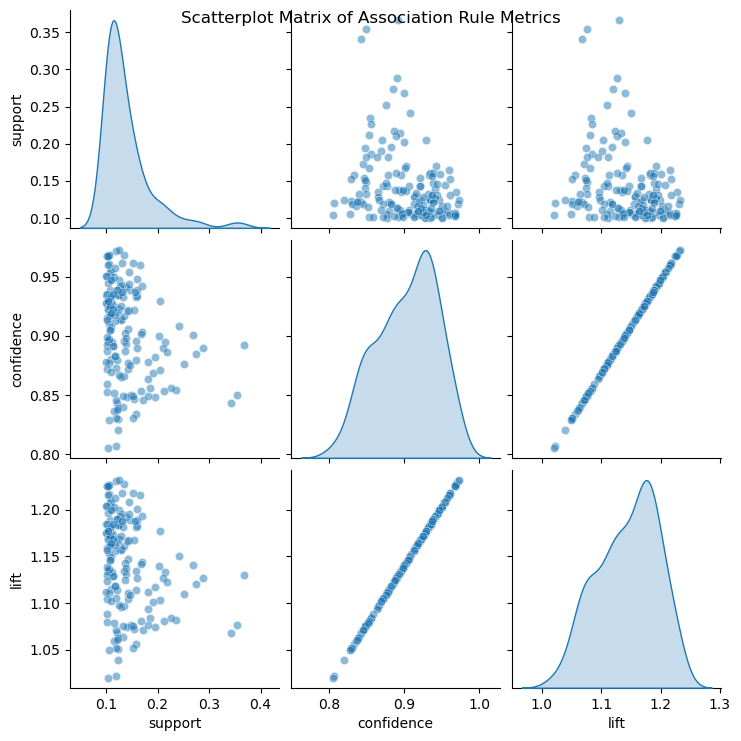

In [13]:
# Scatterplot Matrix
sns.pairplot(rules[['support', 'confidence', 'lift']], kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Scatterplot Matrix of Association Rule Metrics')
plt.show()